In [1]:
import os, sys
import numpy as np

In [3]:
from skimage import io
import pandas as pd
import json

In [4]:
import anndata
import scanpy as sc
import squidpy as sq

In [5]:
data_root = r"E:\LungIMCData\HumanSampling35\LungROIProcessing\Steinbock"

In [8]:
test_roi_name = "H17-0458-5-ROI016"

### Load Indivisual ROI 

In [9]:
roi_h5ad_path = os.path.join(data_root, "rois_h5ad", "{}.h5ad".format(test_roi_name))
roi_adata = sc.read_h5ad(roi_h5ad_path)

### Load cell phenotype information

In [12]:
cell_phenotype_dict = None
cell_phenotype_path = os.path.join(data_root, "cell_phenotypes.json")
with open(cell_phenotype_path) as fp:
    cell_phenotype_dict = json.load(fp)
cell_ids = [ele for ele in cell_phenotype_dict.keys()]
roi_phenotypes_dict = {}
# collect roi list
roi_lst = []
for cell_id in cell_ids:
    roi_name = cell_id[:cell_id.rfind("_")]
    if roi_name not in roi_lst:
        roi_lst.append(roi_name)
# collect roi cell numbers
roi_cell_dict = {}
for cell_id in cell_ids:
    roi_name = cell_id[:cell_id.rfind("_")]
    if roi_name not in roi_cell_dict:
        roi_cell_dict[roi_name] = 1
    else:   
        roi_cell_dict[roi_name] += 1
# collect cell_phenotypes
for roi_name in roi_lst:
    cell_num = roi_cell_dict[roi_name]
    cell_phenotypes = [cell_phenotype_dict[roi_name + "_" + str(num)] for num in range(1, cell_num + 1)]
    roi_phenotypes_dict[roi_name] = pd.Categorical(cell_phenotypes) 

In [13]:
roi_adata.obs["cell_type"] = roi_phenotypes_dict[test_roi_name]

In [14]:
spatial_coords = np.transpose(np.asarray([roi_adata.obs["centroid-1"].tolist(), roi_adata.obs["centroid-0"].tolist()]))
roi_adata.obsm["spatial"] = spatial_coords

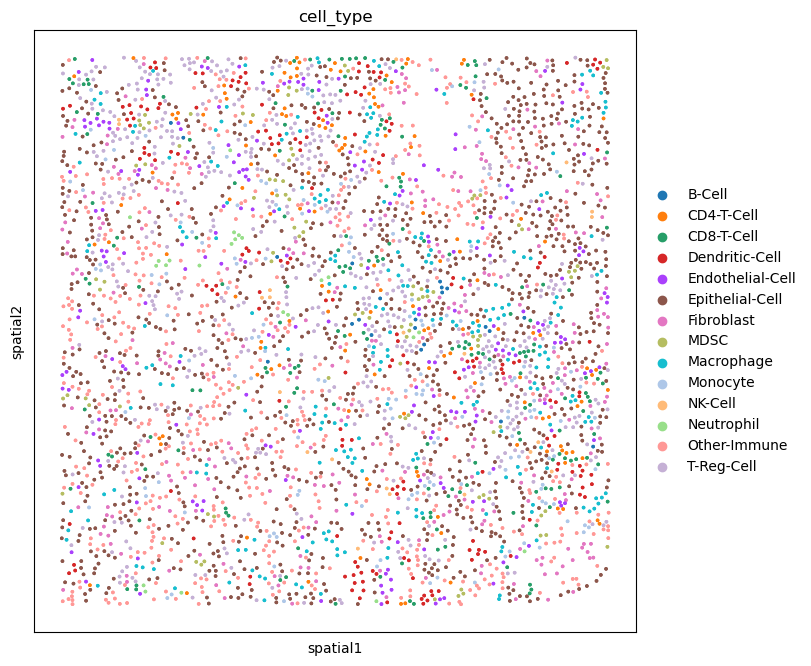

In [15]:
sq.pl.spatial_scatter(roi_adata, shape=None, color="cell_type", figsize=(8, 8), size=10)

In [16]:
sq.gr.spatial_neighbors(roi_adata, spatial_key="spatial", coord_type="generic", radius=16.0)

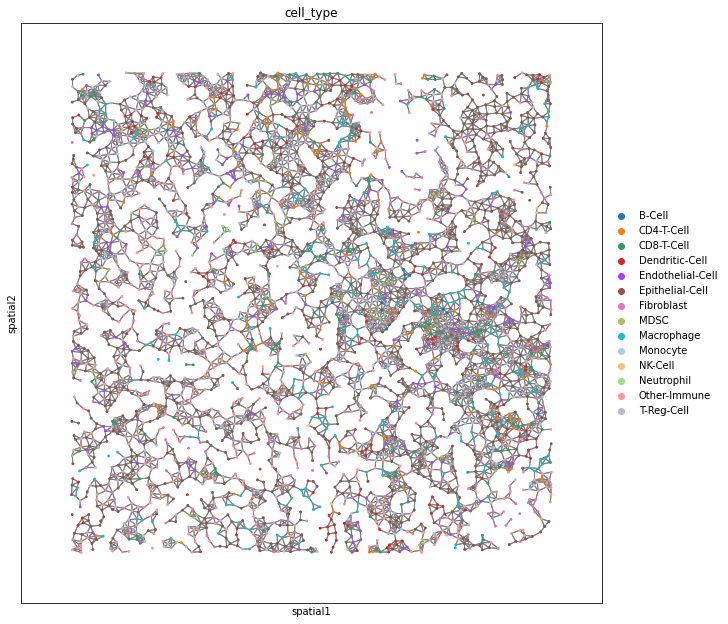

In [18]:
sq.pl.spatial_scatter(roi_adata, shape=None, color="cell_type", connectivity_key="spatial_connectivities", figsize=(10, 10), size=10)

In [21]:
# z_scores, enrichment_counts = sq.gr.nhood_enrichment(roi_adata, cluster_key="cell_type", copy = True)
sq.gr.nhood_enrichment(roi_adata, cluster_key="cell_type")

100%|████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.77/s]


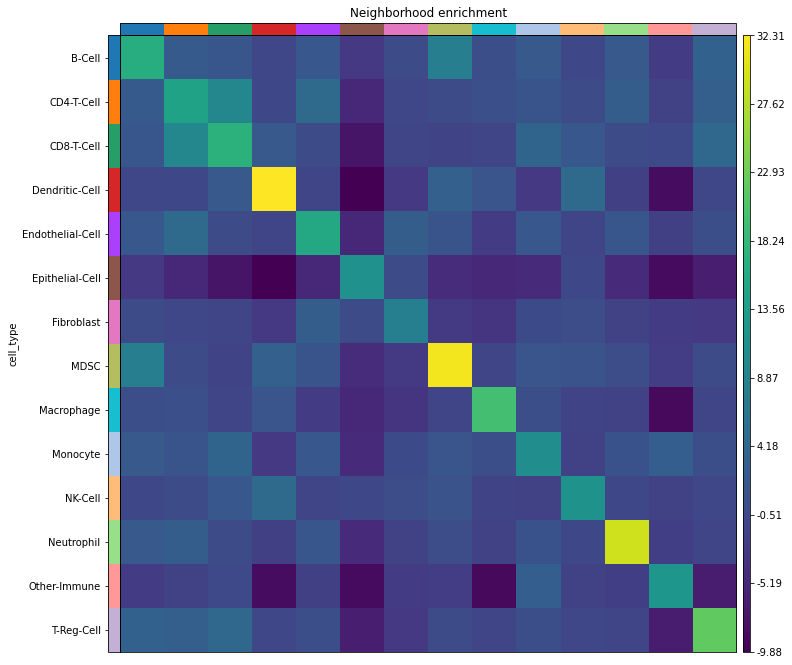

In [23]:
sq.pl.nhood_enrichment(roi_adata, cluster_key="cell_type")

In [22]:
roi_adata.uns['cell_type_nhood_enrichment']

{'zscore': array([[ 1.64614851e+01,  2.11548712e+00,  1.43437569e+00,
         -8.64087350e-01,  1.52763867e+00, -2.94919696e+00,
         -1.30428193e-01,  8.21060037e+00,  2.49957985e-01,
          1.94694525e+00, -7.50057446e-01,  1.85202712e+00,
         -2.52706066e+00,  3.24350233e+00],
        [ 2.11548712e+00,  1.44799509e+01,  9.63104554e+00,
         -7.50505543e-01,  4.68903212e+00, -5.15864475e+00,
         -9.42118527e-01, -2.64882808e-01,  4.36804453e-01,
          1.07974990e+00, -3.20177183e-01,  2.55426364e+00,
         -1.55486871e+00,  2.81613068e+00],
        [ 1.43437569e+00,  9.63104554e+00,  1.71895846e+01,
          1.84999908e+00, -2.30522813e-02, -7.42049322e+00,
         -1.00336252e+00, -1.26761172e+00, -1.02865355e+00,
          3.75481810e+00,  1.54393372e+00, -6.63442859e-02,
         -5.44796761e-01,  4.39301421e+00],
        [-8.64087350e-01, -7.50505543e-01,  1.84999908e+00,
          3.23057337e+01, -1.09977226e+00, -9.88163031e+00,
         -2.872503